<a href="https://colab.research.google.com/github/himanshujadon/California-Housing-Dataset/blob/main/Linear_Regression_on_California_housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
type(california_housing)

sklearn.utils.Bunch

## Dataset Exploration

STEP 1: Dataset Description

In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

STEP 2: Examine the shape of the matrix

In [ ]:
california_housing.data.shape

(20640, 8)

In [ ]:
type(california_housing.data)

pandas.core.frame.DataFrame

STEP 3: Examine the shape of label

In [ ]:
california_housing.target.shape

(20640,)

STEP 4: Feature Names

In [ ]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

STEP 5: Examine sample training examples

In [ ]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


STEP 6: Examine features

In [ ]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


STEP 7: Examine Target

In [ ]:
california_housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

STEP 8: Examine details of features and labels

In [ ]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


STEP 9: Feature and target histograms

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

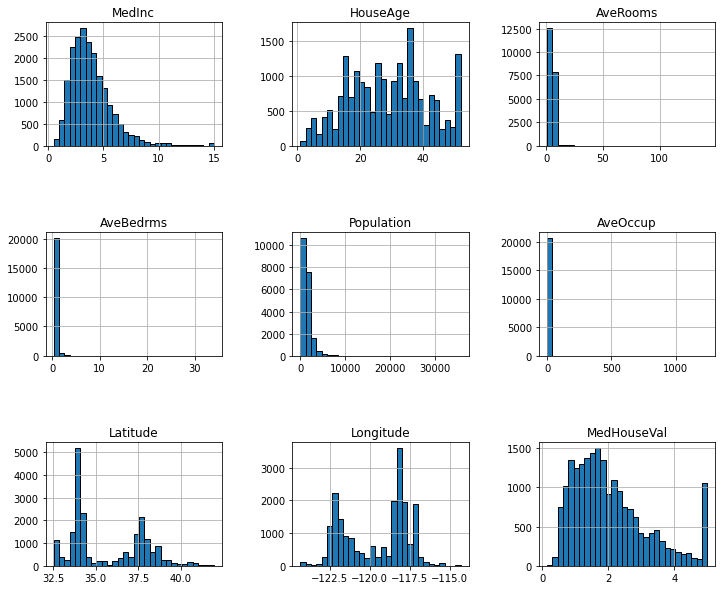

In [ ]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Let's observe these histogram and note down our findings:

*   MedInc has a long tail distribution - salary of people is more or less normally distributed with a few folks getting a high salary.
*   HouseAge has more or less a uniform distribution.
*   The range for features, AveRooms, AveBedrooms, AveOccups, Population, is large and it contains a small number of large values (as there are unnoticable bins on the right in the histogram plots of these features) That would mean that there coulb be certain outliers values present in these features.
*   Latitude and Longitude carry geographical info. Thir combination helps us decide price of the house.
*   MedHouseVal also has a long tail distribution It spikes towards the end. The reason is that the huses with price more than 5 are given value of 5.







In [ ]:
import numpy as np
import pandas as pd

from scipy.stats import loguniform
from scipy.stats import rvs_ratio_uniforms
from scipy.stats import uniform 

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings

warnings.filterwarnings('ignore')

Common set up

In [ ]:
np.random.seed(306)

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Data Loading and splitting

In [ ]:
#fetch_dataset
features, labels = fetch_california_housing(as_frame = True, return_X_y = True)

#train-test-split
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

#train --> train + dev split
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

# Linear regression with normal equation

In [ ]:
lin_reg_pipeline = Pipeline([("feature_scaling", StandardScaler()),
                             ("lin_reg", LinearRegression())])
lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

lin_reg_train_error = -1 * lin_reg_cv_results['train_score']
lin_reg_test_error = -1 * lin_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
f"{lin_reg_train_error.mean():.3f} +/- {lin_reg_train_error.std():3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
f"{lin_reg_test_error.mean():.3f} +/- {lin_reg_test_error.std():3f}")


Mean absolute error of linear regression model on the train set:
0.530 +/- 0.002321
Mean absolute error of linear regression model on the test set:
0.527 +/- 0.007781


Linear regression with SGD

In [ ]:
sgd_reg_pipeline = Pipeline([("feature scaling", StandardScaler()),
                         ("sgd_reg", SGDRegressor(max_iter=np.ceil(
                             1e6/com_train_features.shape[0]),
                          early_stopping=True,
                          eta0=1e-4,
                          learning_rate='constant',
                          tol=1e-5,
                          validation_fraction=0.1,
                          n_iter_no_change=5,
                          average=10,
                          random_state=42))])

sgd_reg_cv_results = cross_validate(sgd_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

sgd_train_error = -1 * sgd_reg_cv_results['train_score']
sgd_test_error = -1 * sgd_reg_cv_results['test_score']

print(f"Mean absolute error of SGD regression model on the train set:\n"
      f"{sgd_train_error.mean():.3f} +/- {sgd_train_error.std():3f}")
print(f"Mean absolute error of SGD regression model on the test set:\n"
      f"{sgd_test_error.mean():.3f} +/- {sgd_test_error.std():3f}")

Mean absolute error of SGD regression model on the train set:
0.564 +/- 0.022667
Mean absolute error of SGD regression model on the test set:
0.561 +/- 0.025297


# Polynomial regression

In [ ]:
poly_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature scaling", StandardScaler()),
                              ("lin_reg",LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

poly_reg_train_error = -1 * poly_reg_cv_results['train_score']
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']                          

print(f"Mean absolute error of Polynomial regression model on the train set:\n"
      f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():3f}")
print(f"Mean absolute error of Polynomial regression model on the test set:\n"
      f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():3f}")

Mean absolute error of Polynomial regression model on the train set:
0.461 +/- 0.002977
Mean absolute error of Polynomial regression model on the test set:
0.485 +/- 0.030312


In [ ]:
poly_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2,interaction_only=True)),
                              ("feature scaling", StandardScaler()),
                              ("lin_reg",LinearRegression())])

poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)

poly_reg_train_error = -1 * poly_reg_cv_results['train_score']
poly_reg_test_error = -1 * poly_reg_cv_results['test_score']                          

print(f"Mean absolute error of Polynomial regression model on the train set:\n"
      f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():3f}")
print(f"Mean absolute error of Polynomial regression model on the test set:\n"
      f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():3f}")

Mean absolute error of Polynomial regression model on the train set:
0.478 +/- 0.002820
Mean absolute error of Polynomial regression model on the test set:
0.497 +/- 0.024387


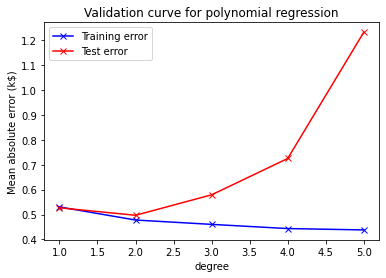

In [ ]:
degree = [1,2,3,4,5]
train_scores, test_scores = validation_curve(
    poly_reg_pipeline, com_train_features, com_train_labels, param_name="poly__degree",
    param_range=degree, cv=cv,scoring="neg_mean_absolute_error",
    n_jobs=2)

train_errors, test_errors = -train_scores, -test_scores
plt.plot(degree, train_errors.mean(axis=1), 'b-x', label="Training error")
plt.plot(degree, test_errors.mean(axis=1), 'r-x', label="Test error")
plt.legend()

plt.xlabel("degree")
plt.ylabel("Mean absolute error (k$)")
_ = plt.title("Validation curve for polynomial regression")


# Ridge Regression:

In [ ]:
ridge_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                               ("feature_scaling", StandardScaler()),
                               ("ridge", Ridge(alpha=0.5))])
ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                      com_train_features,
                                      com_train_labels,
                                      cv=cv,
                                      scoring="neg_mean_absolute_error",
                                      return_train_score=True,
                                      return_estimator=True)

ridge_reg_train_error = -1 * ridge_reg_cv_results['train_score']
ridge_reg_test_error = -1 * ridge_reg_cv_results['test_score']

print(f"Mean absolute error of ridge regression model (alpha=0.5) on the train set:\n "
      f"{ridge_reg_train_error.mean():.3f} +/- {ridge_reg_train_error.std():.3f}")
print(f"Mean absolute error of ridge regression model (alpha=0.5) on the test set:\n "
      f"{ridge_reg_test_error.mean():.3f} +/- {ridge_reg_test_error.std():.3f}")


Mean absolute error of ridge regression model (alpha=0.5) on the train set:
 0.481 +/- 0.003
Mean absolute error of ridge regression model (alpha=0.5) on the test set:
 0.487 +/- 0.006


HPT for ridge regularization rate

In [ ]:
alpha_list = np.logspace(-4, 0, num=20)
ridge_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("ridge_cv", RidgeCV(alphas=alpha_list,
                                                    cv=cv,
                                                    scoring="neg_mean_absolute_error"))])
ridge_reg_cv_results = ridge_reg_pipeline.fit(com_train_features, com_train_labels)

In [ ]:
print("The score with the best alpha is:",
      f"{ridge_reg_cv_results[-1].best_score_:.3f}")
print("The error with the best alpha is:",
      f"{-ridge_reg_cv_results[-1].best_score_:.3f}")

The score with the best alpha is: -0.473
The error with the best alpha is: 0.473


In [ ]:
print("The best value for alpha:", ridge_reg_cv_results[-1].alpha_)

The best value for alpha: 0.007847599703514606


# RidgeCV with cross validation

In [ ]:
alpha_list = np.logspace(-4, 0, num=20)
ridge_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("ridge_cv", RidgeCV(alphas=alpha_list)
                              )])

ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                      com_train_features,
                                      com_train_labels,
                                      cv=cv,
                                      scoring="neg_mean_absolute_error",
                                      return_train_score=True,
                                      return_estimator=True)

ridge_reg_train_error = -1 * ridge_reg_cv_results['train_score']
ridge_reg_test_error = -1 * ridge_reg_cv_results['test_score']

print(f"Mean absolute error of ridge regression model (alpha=0.5) on the train set:\n "
      f"{ridge_reg_train_error.mean():.3f} +/- {ridge_reg_train_error.std():.3f}")
print(f"Mean absolute error of ridge regression model (alpha=0.5) on the test set:\n "
      f"{ridge_reg_test_error.mean():.3f} +/- {ridge_reg_test_error.std():.3f}")


Mean absolute error of ridge regression model (alpha=0.5) on the train set:
 0.470 +/- 0.011
Mean absolute error of ridge regression model (alpha=0.5) on the test set:
 0.474 +/- 0.011


# Ridge HPT through GridSearchCV




In [ ]:
ridge_grid_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                                                                  ("feature_scaling", StandardScaler()),
                                                                   ("ridge", Ridge())])

param_grid = {'poly__degree': (1, 2, 3),
              'ridge__alpha': np.logspace(-4, 0, num=20)}
ridge_grid_search = GridSearchCV(ridge_grid_pipeline,
                                 param_grid = param_grid,
                                 n_jobs=2,
                                 cv=cv,
                                 scoring="neg_mean_absolute_error",
                                 return_train_score=True)
ridge_grid_search.fit(com_train_features, com_train_labels)                                                                                                      

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
mean_train_error = -1 * ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error = -1 * ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error = ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error = ridge_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]

print(f"Best Mean absolute error of polynomial ridge regression model on the train set:\n"
      f"{mean_train_error:.3f} +/- {std_train_error:.3f}")
print(f"Best Mean absolute error of polynomial ridge regression model on the test set:\n"
      f"{mean_test_error:.3f} +/- {std_test_error:.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.463 +/- 0.004
Best Mean absolute error of polynomial ridge regression model on the test set:
0.474 +/- 0.015


In [ ]:
print("Mean cross validated score of the best estimator is: ", ridge_grid_search.best_score_)
print("Mean cross validated error of the best estimator is: ", -ridge_grid_search.best_score_)

Mean cross validated score of the best estimator is:  -0.4738651176991914
Mean cross validated error of the best estimator is:  0.4738651176991914


In [ ]:
print("The best parameter value is:", ridge_grid_search.best_params_)

The best parameter value is: {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}


# Lasso Regression
Baseline model with fixed learning rate

In [ ]:
lasso_reg_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("lasso", Lasso(alpha=0.01))])
lasso_reg_cv_results = cross_validate(lasso_reg_pipeline,
                                      com_train_features,
                                      com_train_labels,
                                      cv=cv,
                                      scoring="neg_mean_absolute_error",
                                      return_train_score=True,
                                      return_estimator=True)

lasso_reg_train_error = -1 * lasso_reg_cv_results['train_score']
lasso_reg_test_error = -1 * lasso_reg_cv_results['test_score']

print(f"Mean absolute error of lasso regression model (alpha=0.01) on the train set:\n "
      f"{lasso_reg_train_error.mean():.3f} +/- {lasso_reg_train_error.std():.3f}")
print(f"Mean absolute error of lasso regression model (alpha=0.01) on the test set:\n "
      f"{lasso_reg_test_error.mean():.3f} +/- {lasso_reg_test_error.std():.3f}")


Mean absolute error of lasso regression model (alpha=0.01) on the train set:
 0.529 +/- 0.003
Mean absolute error of lasso regression model (alpha=0.01) on the test set:
 0.528 +/- 0.008


## HPT for Lasso Regularization

### with GridSearchCV

In [ ]:
lasso_grid_pipeline = Pipeline([("poly", PolynomialFeatures(degree=2)),
                              ("feature_scaling", StandardScaler()),
                              ("lasso", Lasso())])
param_grid = {'poly__degree': (1, 2, 3),
              'lasso__alpha': np.logspace(-4, 0, num=20)}
lasso_grid_search = GridSearchCV(lasso_grid_pipeline,
                                 param_grid=param_grid,
                                 n_jobs=2,
                                 cv=cv,
                                 scoring="neg_mean_absolute_error",
                                 return_train_score=True)
lasso_grid_search.fit(com_train_features, com_train_labels)              

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=2,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         'poly__degree': (1, 2, 3)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
mean_train_error = -1 * lasso_grid_search.cv_results_['mean_train_score'][lasso_grid_search.best_index_]
mean_test_error = -1 * lasso_grid_search.cv_results_['mean_test_score'][lasso_grid_search.best_index_]
std_train_error = lasso_grid_search.cv_results_['std_train_score'][lasso_grid_search.best_index_]
std_test_error = lasso_grid_search.cv_results_['std_test_score'][lasso_grid_search.best_index_]

print(f"Best Mean absolute error of polynomial lasso regression model on the train set:\n"
      f"{mean_train_error:.3f} +/- {std_train_error:.3f}")
print(f"Best Mean absolute error of polynomial lasso regression model on the test set:\n"
      f"{mean_test_error:.3f} +/- {std_test_error:.3f}")

Best Mean absolute error of polynomial lasso regression model on the train set:
0.462 +/- 0.003
Best Mean absolute error of polynomial lasso regression model on the test set:
0.488 +/- 0.046


In [ ]:
print("The best parameter value is:", lasso_grid_search.best_params_)

The best parameter value is: {'lasso__alpha': 0.0001, 'poly__degree': 3}


In [ ]:
print("Mean cross validated score of the best estimator value is:", lasso_grid_search.best_score_)

Mean cross validated score of the best estimator value is: -0.48798304453391356


# SGD: Regularization and HPT

In [ ]:
poly_sgd_pipeline = Pipeline([("poly", PolynomialFeatures()),
                              ("feature_scaling", StandardScaler()),
                              ("sgd_reg", SGDRegressor(
                                  penalty='elasticnet',
                                  random_state=42))])
poly_sgd_cv_results = cross_validate(poly_sgd_pipeline,
                                      com_train_features,
                                      com_train_labels,
                                      cv=cv,
                                      scoring="neg_mean_absolute_error",
                                      return_train_score=True,
                                      return_estimator=True)

poly_sgd_train_error = -1 * poly_sgd_cv_results['train_score']
poly_sgd_test_error = -1 * poly_sgd_cv_results['test_score']

print(f"Mean absolute error of SGD regression model on the train set:\n "
      f"{poly_sgd_train_error.mean():.3f} +/- {poly_sgd_train_error.std():.3f}")
print(f"Mean absolute error of SGD regression model on the test set:\n "
      f"{poly_sgd_test_error.mean():.3f} +/- {poly_sgd_test_error.std():.3f}")

Mean absolute error of SGD regression model on the train set:
 10824283052.546 +/- 4423288211.832
Mean absolute error of SGD regression model on the test set:
 10946788540.250 +/- 5396536227.703


Let's search for the best set of paramters for polynomial+SGD pipeline with `RandomizedSearvhCV`.

> Remember in RandomizedSearchCV, we need to specify distributions for hyperparameters.



In [ ]:
class uniform_int:
  '''Integer valued version of the uniform distribution'''
  def __init__(self, a, b):
    self._distribution = uniform(a, b)

  def rvs(self, *args, **kwargs):
    return self._distribution.rvs(*args, **kwargs).astype(int)

In [ ]:
param_distributions = {
    'poly__degree' : [1, 2, 3],
    'sgd_reg__learning_rate': ['constant', 'adaptive', 'invscaling'],
    'sgd_reg__l1_ratio': uniform(0, 1),
    'sgd_reg__eta0': loguniform(1e-5, 1),
    'sgd_reg__power_t': uniform(0, 1)
} 

poly_sgd_random_search = RandomizedSearchCV(
    poly_sgd_pipeline, param_distributions = param_distributions,
    n_iter=10, cv=cv, verbose=1, scoring='neg_mean_absolute_error'
)
poly_sgd_random_search.fit(com_train_features, com_train_labels)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd_reg',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': [1, 2, 3],
                                        'sgd_reg__eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faa07969c10>,
                                        'sgd_reg__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7faa06f94910>,
                                        'sgd_reg__learning_rate': ['constant',
                                                                   'a

Comparison of weight vectors

In [ ]:
feature_names = poly_reg_cv_results["estimator"][0][0].get_feature_names_out(
    input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge AveRooms', 'HouseAge AveBedrms', 'HouseAge Population',
       'HouseAge AveOccup', 'HouseAge Latitude', 'HouseAge Longitude',
       'AveRooms AveBedrms', 'AveRooms Population', 'AveRooms AveOccup',
       'AveRooms Latitude', 'AveRooms Longitude', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup Latitude', 'AveOccup Longitude',
       'Latitude Longitude'], dtype=object)

In [ ]:
coefs = [est[-1].coef_ for est in poly_reg_cv_results["estimator"]]
weights_polynomial_regression = pd.DataFrame(coefs, columns=feature_names)

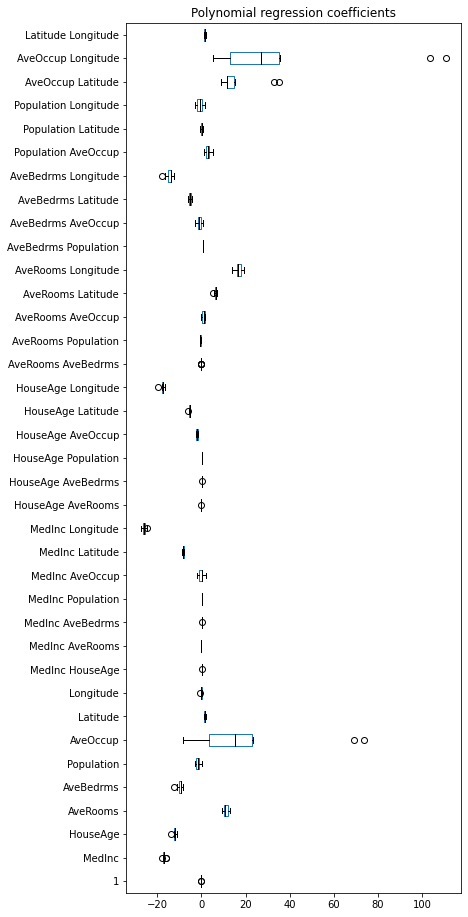

In [ ]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_polynomial_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Polynomial regression coefficients")

In [ ]:
feature_names = ridge_reg_cv_results["estimator"][0][0].get_feature_names_out(
    input_features=train_features.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [ ]:
coefs = [est[-1].coef_ for est in ridge_reg_cv_results["estimator"]]
weights_ridge_regression = pd.DataFrame(coefs, columns=feature_names)

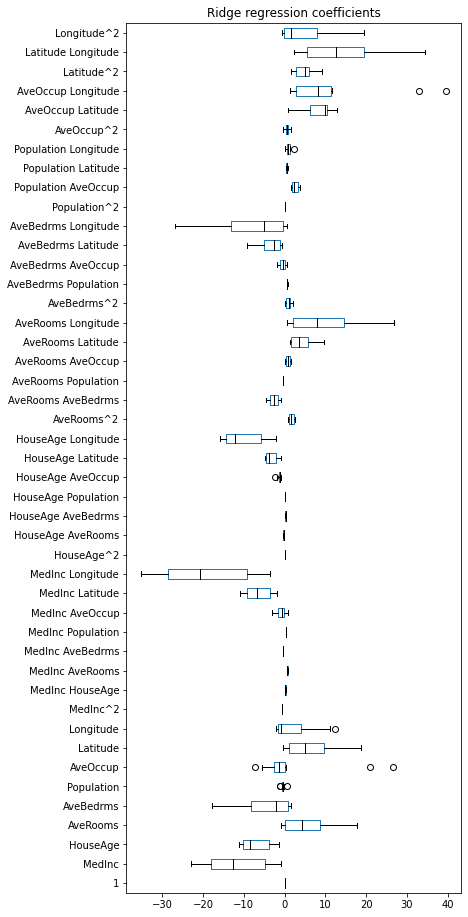

In [ ]:
color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_ridge_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge regression coefficients")

# Performance on the test set:

Baseline

In [ ]:
baseline_model_median = DummyRegressor(strategy='median')
baseline_model_median.fit(train_features, train_labels)
mean_absolute_percentage_error(test_labels, baseline_model_median.predict(test_features))

0.5348927548151625

Linear regression with normal equation

In [ ]:
mean_absolute_percentage_error(test_labels,
                               lin_reg_cv_results['estimator'][0].predict(
                                   test_features))

0.32120472175482906

In [ ]:
mean_absolute_percentage_error(test_labels,
                               poly_reg_cv_results['estimator'][0].predict(
                                   test_features))

0.2834129629962902

Polynomial regression

In [ ]:
poly_reg_pipeline.fit(com_train_features, com_train_labels)
mean_absolute_percentage_error(test_labels,
                               poly_reg_pipeline.predict(
                                   test_features))

0.28199759082657244

Ridge Regression

In [ ]:
mean_absolute_percentage_error(test_labels, 
                               ridge_grid_search.best_estimator_.predict(test_features))

0.27110336451421413

Lasso Regression

In [ ]:
mean_absolute_percentage_error(test_labels, 
                               lasso_grid_search.best_estimator_.predict(test_features))

0.28074969263810107

# Summary

We trained multiple linear regression models on housing dataset. Set their hyperparamters through hyper-parameter optimization. Retrained models with the best values of hyper-parameters and then evaluated their performance on the test data (that was hold back until final evaluation).

This is how most of the real world problems are solved starting from simple models to more sophisticated models.